This is an example of the appliction of agapy over the Rossembrock function. Detailed properties of the function can be seen at https://en.wikipedia.org/wiki/Rosenbrock_function

In [4]:
from agapy import agapy

import matplotlib.pyplot as plt
from IPython.display import display, clear_output
%matplotlib inline
from matplotlib.patches import Rectangle

import numpy as np

In [5]:
# Let's define the parameters that will shape the function
a, b = 6, 10.

Let's define the Rossenbrock function. This function will be called by agapy along the minimization process

In [6]:
def RB(X):
    # Function receives unidimensional arrays. 
    # Unpacking should be done inside this function
    # parameters are always ordered in the same
    # order as -bounds- (see below).
    x1,x2 = X[0],X[1]

    rosenbrock = (a-x1)**2 + b*(x2-x1**2)**2
    
    return rosenbrock

The global solution reside at ($a$,$a^2$)

We define the boundaries for each parameter 

In [33]:
bounds = ((-20,20), (-10,70)) # These boundaries are for parameter x1 and x2

Instantiate the class with the following attributes

In [47]:
ag = agapy(bounds = bounds,   # boundaries ordered by parameter
           generations = 60,  # number of generations
           individuals = 100,  # number of individuals at each generation
           fparents = .1,     # fraction of individuals that turn into parents
           p = 0.95            # a parameter controlling the velocity of boundaries reduction
          )

Running agapy, by providing the function to minimize

In [48]:
box, F, evol = ag.run(RB)

It returns: 

* box: Hypercube containing the vertex of the boundaries at each generation. These hyperboxes are centered over each parent of the current generation.

* F: The value of the function for each parent, at each generation.

* evol: The individuals location at each generation, sorted by F. Initial individuals are the parents of the generation

### Visualization

In [49]:
# Background of the figure highlighting the density of probabilities
def background(x,y):
    
    fig = plt.figure(figsize=(10,6))
    
    X, Y = np.meshgrid(x, y)
    Z = []
    for j in y:
        for i in x:
            Z.append(RB(np.array([i,j])))
            
    Z = np.array(Z).reshape(len(y),len(x))
    plt.contourf(X,Y, np.log(Z), 200, cmap='viridis')

    cbar = plt.colorbar()
    cbar.set_label(r'Probability', size=15);
    cbar.ax.tick_params(labelsize=15)
    
    return fig

Figure showing the evolution of the solutions along the generations

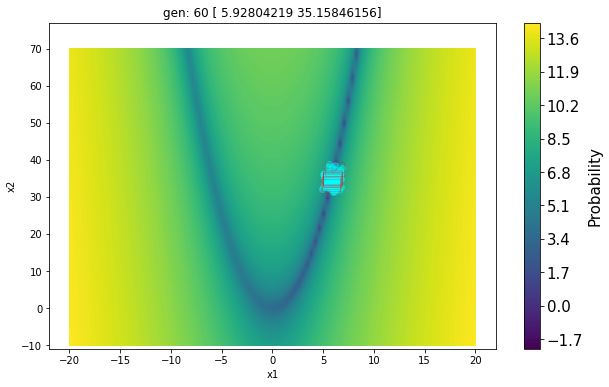

In [50]:
# Arrays to make a meshgrid
x = np.linspace(bounds[0][0], bounds[0][1], 100)  # Eje x
y = np.linspace(bounds[1][0], bounds[1][1], 100)  # Eje y


# Iteratively draw the found solutions
for g, pop in enumerate(evol):  # Run over "evol"
    
    fig = background(x,y)
    
    # Draw the boxes of the new bounds around the parents
    for caja in box[g]: #iterate over number of parents
        width = caja[0][1] - caja[0][0]
        height= caja[1][1] - caja[1][0]

        plt.gca().add_patch(Rectangle((caja[0][0],caja[1][0]), 
                                      width, 
                                      height, 
                                      alpha=0.2, 
                                      color='red',
                                      fill=False))

    # Plot in the title, the best solution at each generation
    plt.title(f"gen: {g+1} {pop[0]}")  #| {np.mean(pop[:,0])} - {np.mean(pop[:,1])}
    
    # Mark where the true solution is
    plt.scatter(a,a**2, marker='*', color='orange',s=20)
    
    # Plot the individuals
    plt.scatter(pop[:,0], pop[:,1], alpha=0.4, color='cyan');

    plt.xlim(np.array(bounds[0])*1.1)
    plt.ylim(np.array(bounds[1])*1.1)
    plt.xlabel("x1")
    plt.ylabel("x2")

    display(fig)
    plt.close(fig)
    clear_output(wait=1)


In [51]:
X_agapy = evol[-1][0] # Take last iteration and first parent (the best solution!)

print(f"The true solution reside at: {a}, {a**2}")
print(f"agapy found: {X_agapy}")

The true solution reside at: 6, 36
agapy found: [ 5.92804219 35.15846156]
